### Harmonic (WSS) Process 

 **Author:** Arun Prakash A, arunprakash.ece@kongu.ac.in
 
 * One of the predominant type of Wide Sense Stationary(WSS) random process is Harmonic Process. It arises in all components of communication systems such as in oscillators.
 
 * It also serves us to understand the behaviour of random phase sinusoids.
 
 * Recall, Fourier transform decomposes a signal into its harmonics. Therefore, we could extend the study to any type of waveforms in general (except non-stationary signals).

In [1]:
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt

In [2]:
A = 1
n = np.arange(30)
w0 = 0.25*np.pi
xn = A *np.sin(n*w0)

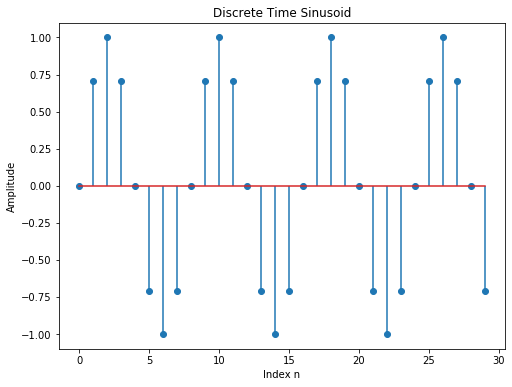

In [3]:
#Plot the process
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.stem(n,xn,use_line_collection=True)
ax.set_title('Discrete Time Sinusoid')
ax.set_xlabel('Index n')
ax.set_ylabel('Amplitude')
plt.show()

Generating a few realizations of a harmonic process: $ x(n) = A sin(n \omega_0 + \phi)$ where $\phi \in (-\pi \rightarrow \pi)$ follows the uniformation distribution. 

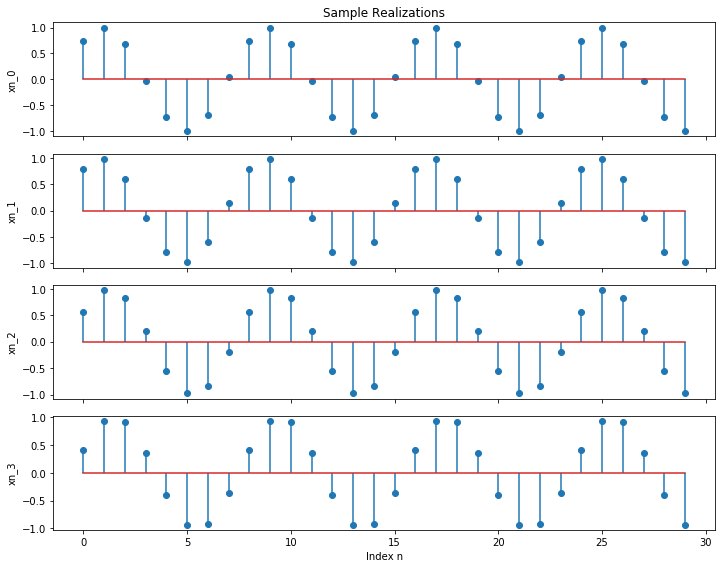

In [4]:
w0 = 0.25*np.pi
fig,ax = plt.subplots(4,1,figsize=(10,8),sharex=True)
#Plot the process
for i in range(4):
    xn = A *np.sin(n*w0 +np.random.rand())
    ax[i].stem(n,xn,use_line_collection=True)
    ax[i].set_ylabel('xn_'+str(i))
ax[3].set_xlabel('Index n')
ax[0].set_title('Sample Realizations')
fig.tight_layout()

### Computing autocorrelation

For the Wide-Sense Stationary Process (WSS), we can write, 
$$ r_x = E[x(k)x(l)] = E[x(n+k)x(n+l)]$$ <br>

then computing the autocorrelation for the harmonic process boils down to simple relation (remember it is no longer a function of $\phi$) 

$$ r_x(k,l) = \frac{A^2}{2} cos\bigg((k-l) \omega_0 \bigg) $$

**Key Observations**
 
 * $k-l = 0$ implies that $k=l$, that is, it is the variance of all the RVs (in the RP) with itself.
 * $k-l = 1$ implies the correlation between any two consecutive RVs in the entire sequence (**Since it is a WSS process, the origin of the sequence (n=0) doesn't affect the value**)
 * $k-l = m $ implies the correlation between two samples that are $m-1$ samples away from each other. 


Let us plot the correlation function computed above for all possible lags which spans, in this case, from 0 to 29, <br> $ n = k-l=0,1,2,3,4,5,6,7,8,9...29 \ \ \& \ \omega_0=0.25\pi, \ A=1$

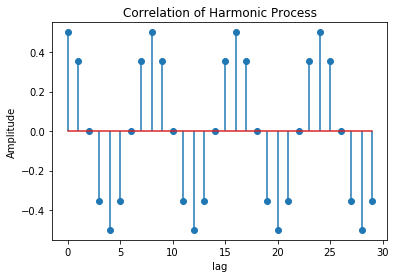

In [5]:
n = np.arange(30)
rx_actual = 0.5*np.cos(n*w0)
plt.stem(rx_actual,use_line_collection=True)
plt.xlabel('lag')
plt.ylabel('Amplitude')
plt.title('Correlation of Harmonic Process')
plt.show()

Let us pretend that we don't have the actual formula for the correlation, instead what we have is a few realizations of the process stored in the variable $Xn$. Let us compute correlation using the sample realizations

In [6]:
#Let us create a few realizations
m = 100
phi = np.random.uniform(-np.pi,np.pi,(1,m)) # reshape for compatability
n = np.arange(30).reshape(1,30) # reshape required to use repeat function
n = np.repeat(n,[m],axis=0)
Xn = np.sin(n*w0+ phi.T)# generate realizations

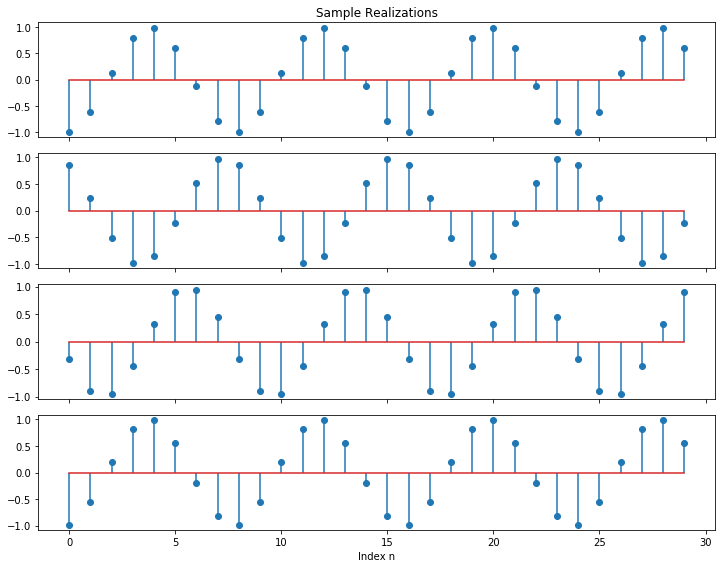

In [7]:
fig,ax = plt.subplots(4,1,figsize=(10,8),sharex=True)
ax[0].stem(Xn[0,:],use_line_collection=True)
ax[1].stem(Xn[1,:],use_line_collection=True)
ax[2].stem(Xn[2,:],use_line_collection=True)
ax[3].stem(Xn[3,:],use_line_collection=True)
ax[3].set_xlabel('Index n')
ax[0].set_title('Sample Realizations')
fig.tight_layout()

In [8]:
# Compute autocorrelation
rx_est = np.cov(Xn.T)[0,:] #np.cov() matrix is a toeplitz matrix, therefore, first row is sufficient to represnet entire matrix

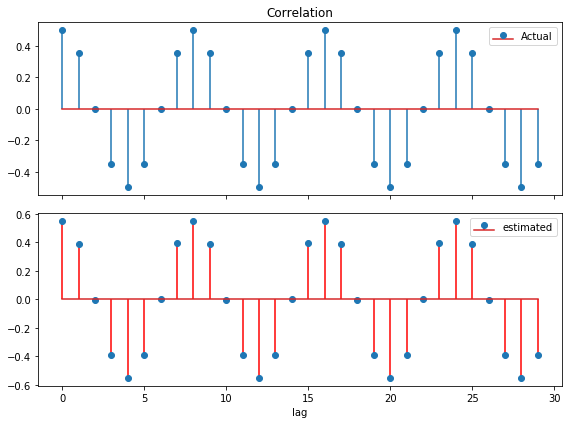

In [9]:
fig,ax = plt.subplots(2,1,figsize=(8,6),sharex=True)
ax[0].stem(rx_actual,use_line_collection=True,label='Actual')
ax[1].stem(rx_est,linefmt='r',use_line_collection=True,label='estimated')
ax[0].legend()
ax[1].legend()
ax[1].set_xlabel('lag')
ax[0].set_title('Correlation')
fig.tight_layout()

Let us display the symmetric matrix of np.cov and **Observe the Periodicity of the patterns**. Contemplate why it occurs?

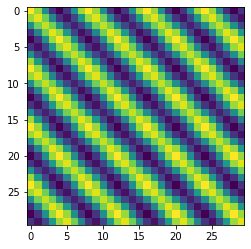

In [10]:
plt.imshow(np.cov(Xn.T))
plt.show()